# Morphological Operators

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)
    
def load():
    img = cv2.imread('../Test_Photo/watermark_marvel.png').astype(np.float32) / 255
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

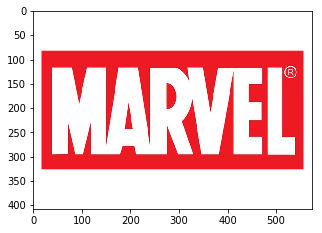

In [6]:
img = load()
display(img)

#### 我們先要來介紹關於Erosion,可以將照片中的前方的字侵蝕

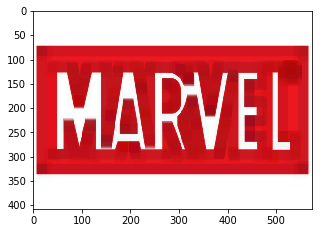

In [36]:
# 定義Kernel size
kernel = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(img,kernel,iterations = 5)
display(erosion1)

#### 從上方的結果可以看到白色的地方被紅色的顏色侵蝕掉, 這可以幫助如果之後有些照片中比較細微的地方直接使用erode抓取

#### 當然除了可以用背景將前景的字侵蝕掉, 我們當然也可以前景侵蝕背景的方式. 這個方式就是dilate

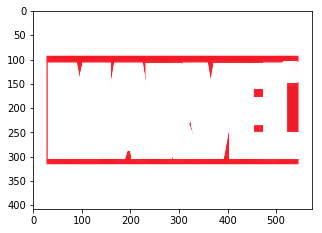

In [34]:
img_dilation = cv2.dilate(img, kernel, iterations=5)
display(img_dilation)

#### 接下來介紹關於Opening 的概念, Opening主要可以幫助我們將一些白色的雜訊去除掉

In [11]:
img = load()
img.shape

(408, 575, 3)

In [19]:
# 產生white noise
white_noise = np.random.randint(0,2,(408,575,3))
# white_noise

In [20]:
print(img.max())
print(img.min())

1.0
0.023529412


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


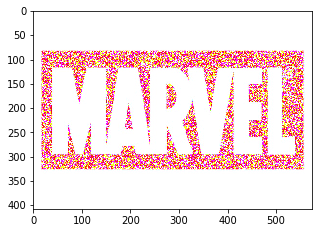

In [24]:
noise_img = img + white_noise
display(noise_img)

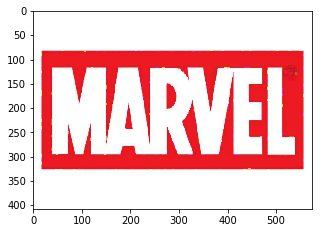

In [25]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
display(opening)

#### 除了可以用Opening 去將白色雜訊去除以為, 我們可以使用Closing將黑色的雜訊去除

In [26]:
# 產生white noise
black_noise = np.random.randint(0,2,(408,575,3))
black_noise = black_noise * -255
black_img = img + black_noise

In [28]:
black_img[black_img==-255] = 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


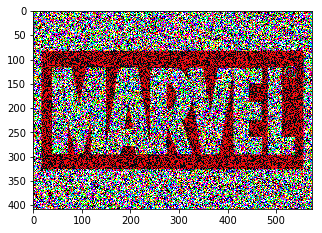

In [29]:
display(black_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


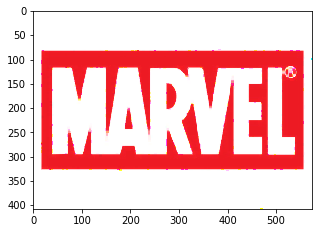

In [30]:
closing = cv2.morphologyEx(black_img, cv2.MORPH_CLOSE, kernel)
display(closing)

#### 最後一個要介紹就是MORPH_GRADIENT的方式,MORPH_GRADIENT是顯示出dilated 與eroded後的照片相減出來的結果

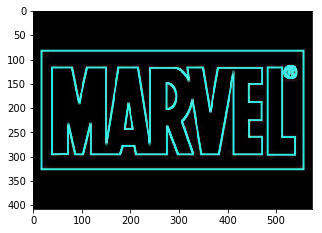

In [32]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display(gradient)